In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,MaxPool2D,Activation,Conv2D
from sklearn.metrics import classification_report

In [2]:
data_dir='D:\skin cancer'
labels = ['benign', 'malignant']
img_size = 100
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train=get_data(r'D:\skin cancer\train')
test=get_data(r'D:\skin cancer\test')

C:\Users\AT\AppData\Local\Temp/ipykernel_8308/1976225268.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


C:\Users\AT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

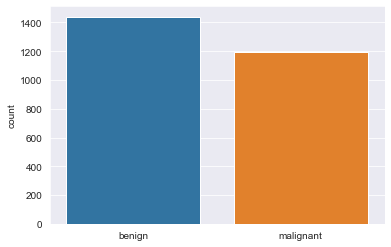

In [4]:
import seaborn as sns
l = []
for i in train:
    if(i[1] == 0):
        l.append("benign")
    else:
        l.append("malignant")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'benign')

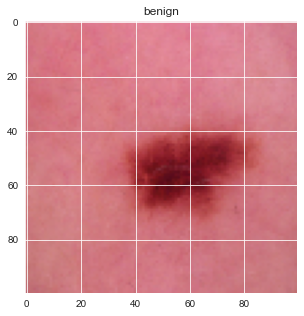

In [5]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

In [6]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in test:
  x_val.append(feature)
  y_val.append(label)

x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [7]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [8]:
#from tensorflow.keras.optimizers import adam
model = Sequential()
model.add(Conv2D(64,(3,3),padding="same", activation="relu", input_shape=(100,100,3)))
model.add(MaxPool2D())

model.add(Conv2D(64,(3,3) , padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

In [21]:
import tensorflow
opt = Adam(lr=0.001)
model.compile(optimizer = opt , loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [19]:
history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))

Epoch 1/10


C:\Users\AT\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


83/83 [==============================] - 111s 1s/step - loss: 0.6131 - accuracy: 0.6443 - val_loss: 0.4903 - val_accuracy: 0.7152
Epoch 2/10
83/83 [==============================] - 114s 1s/step - loss: 0.4665 - accuracy: 0.7763 - val_loss: 0.4743 - val_accuracy: 0.7667
Epoch 3/10
83/83 [==============================] - 109s 1s/step - loss: 0.4156 - accuracy: 0.8032 - val_loss: 0.3922 - val_accuracy: 0.7894
Epoch 4/10
83/83 [==============================] - 109s 1s/step - loss: 0.4445 - accuracy: 0.7785 - val_loss: 0.4188 - val_accuracy: 0.7788
Epoch 5/10
83/83 [==============================] - 115s 1s/step - loss: 0.3993 - accuracy: 0.8039 - val_loss: 0.3605 - val_accuracy: 0.8076
Epoch 6/10
83/83 [==============================] - 104s 1s/step - loss: 0.3674 - accuracy: 0.8146 - val_loss: 0.3431 - val_accuracy: 0.8318
Epoch 7/10
83/83 [==============================] - 107s 1s/step - loss: 0.3531 - accuracy: 0.8297 - val_loss: 0.3920 - val_accuracy: 0.8015
Epoch 8/10
83/83 [======

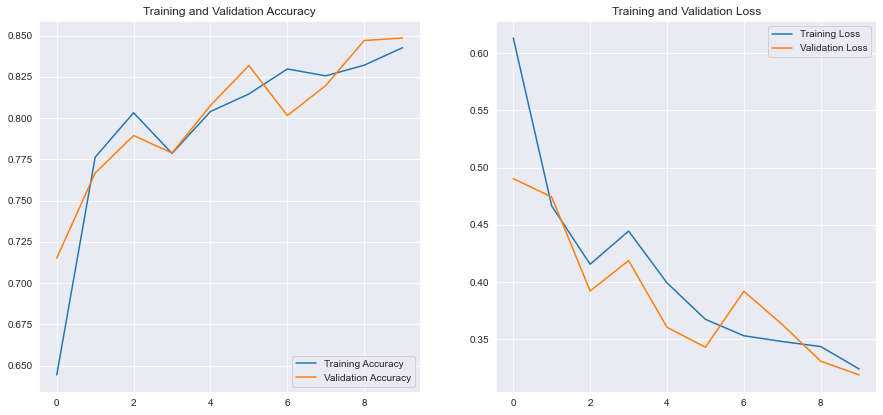

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(data))

In [66]:

predictions = model.predict(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions))

ValueError: Found input variables with inconsistent numbers of samples: [660, 1320]